In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib

/home/norm/hoai_workspace/hoai_env/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
df = pd.read_csv('../data/cars/train_data.csv', sep = '\t', encoding='utf-8')

In [193]:
y = df['price']
X = df.drop(['price'], axis = 1)

## Numerical features

In [4]:
df_nums = df.copy()

In [5]:
num_cols = ['length','height','width','weight','emissionsCO2','numberOfAxles',
            'numberOfDoors','numberOfForwardGears','seatingCapacity','cargoVolume','roofLoad',
            'accelerationTime','fuelCapacity','fuelConsumption','speed',
            'payload','trailerWeight','vEengineDisplacement','vEenginePower','torque']

for col in num_cols:
    df_nums[col] = df_nums[col].apply(lambda x: df_nums[col].mean() if str(x) == 'nan' else x)

NameError: name 'draw_df' is not defined

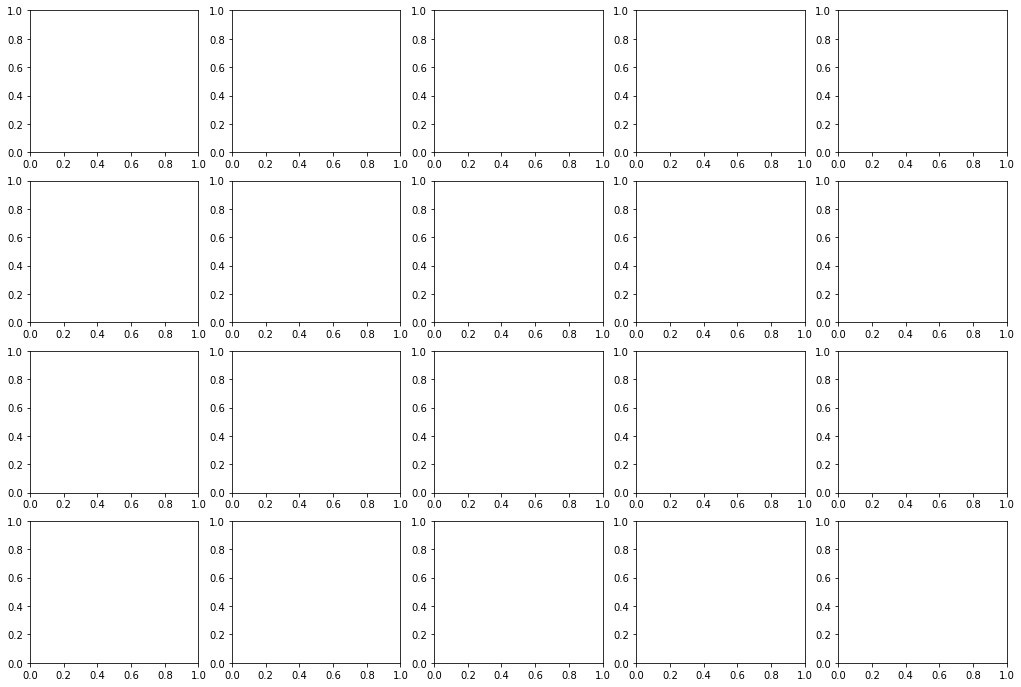

In [6]:
nr_rows = 4
nr_cols = 5

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(num_cols):
            sns.regplot(df_nums[num_cols[i]], df_nums['price'], ax = axs[r][c])
            stp = stats.pearsonr(df_nums[num_cols[i]], draw_df['price'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()

We will the features having low correlation with `price`

In [5]:
low_corr_nums = ['height', 'numberOfAxles', 'numberOfDoors', 'seatingCapacity',
                 'cargoVolume', 'accelerationTime']

## Categorical features

In [8]:
df_cats = df.copy()

In [9]:
cat_cols = ['vEfuelType', 'driveWheelConfiguration',
            'brand', 'eLabel', 'bodyType', 'vEengineType']

for col in num_cols:
    # df_cats[col] = df_cats[col].apply(lambda x: df_cats[col].mode() if str(x) == 'nan' else x)
    df_cats[col] = df_cats[col].fillna(df_cats[col].mode())

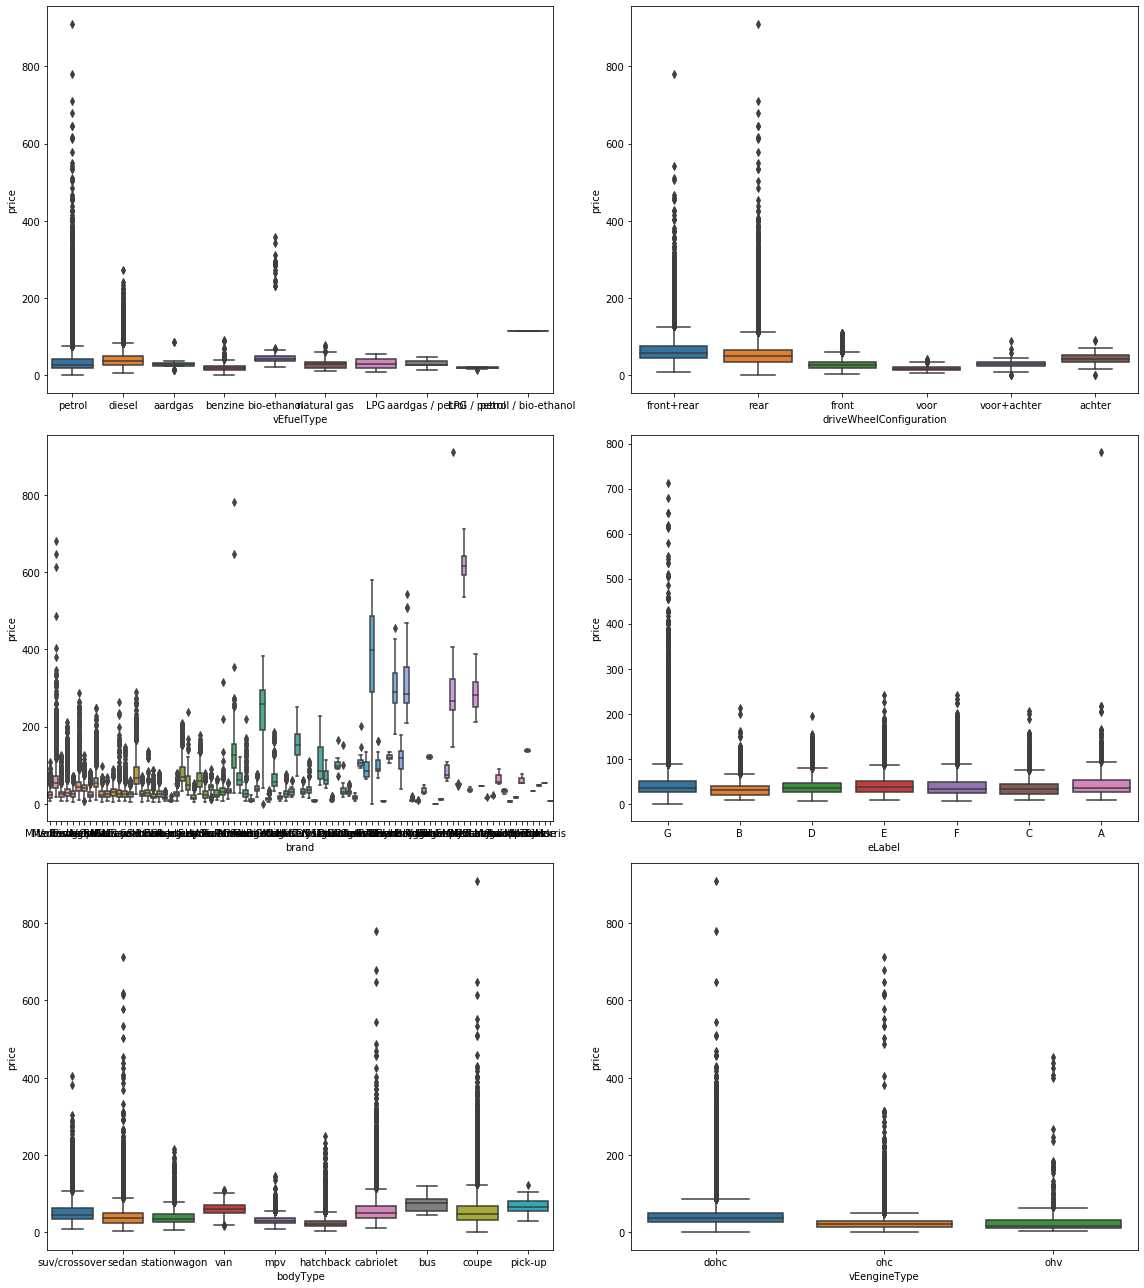

In [10]:
nr_rows = 3
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*8,nr_rows*6))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(cat_cols):
            sns.boxplot(x=cat_cols[i], y=df_cats.price, data=df_cats, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

In [163]:
df_cats.groupby('brand')['price'].mean()

brand
Abarth           30.905328
Alfa Romeo       33.109244
Asia Motors      16.444000
Aston Martin    246.653593
Audi             49.542469
Austin           10.449758
Autobianchi       6.712750
BMW              59.360647
Bentley         302.463500
Bugatti           0.000000
Buick            47.976000
Cadillac         68.246398
Carver           46.846000
Chevrolet        34.366553
Chrysler         38.134372
Citroen          26.989647
Corvette        115.261538
DS               31.690640
Dacia            17.112112
Daewoo           16.342610
Daihatsu         13.491688
Daimler         103.713667
Datsun            9.555829
Dodge            37.928195
Donkervoort     115.850067
FSO               7.706650
Ferrari         290.358511
Fiat             20.725669
Fisker          120.373000
Ford             25.785400
                   ...    
Mitsubishi       24.893439
Morgan          108.094560
Morris            7.891000
Nissan           28.753138
Noble           120.983000
Opel             24.39

In [197]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = 5):
        self.threshold = threshold
        self.group_dict = None
    def fit(self, X_df, y):
        X_df['price'] = y
        brand_group = X_df.groupby('brand')['price'].mean().sort_values()
        g_idx = 0
        group = [0]
        for i in range(1, brand_group.shape[0]):
            if (brand_group[i] - brand_group[g_idx]) < self.threshold:
                group.append(g_idx)
        else:
            g_idx += 1
            group.append(g_idx)
        self.group_dict = dict(zip(brand_group.index, group))
        return self
    def transform(self, X_df, y):
        df = X_df.copy()
        df['price'] = y
        df['brand'] = df.brand.apply(lambda x: group_dict[x] if x in group_dict else (len(group_dict) + 1))
        return df

In [199]:
coladderdropper = ColAdderDropper()
coladderdropper.fit_transform(X, y)

TypeError: transform() missing 1 required positional argument: 'y'

In [177]:
b = pd.DataFrame(brand_group)
b.reset_index(level=0, inplace=True)

In [15]:
b = b.sort_values(by='price')
b.reset_index(drop=True, inplace=True)

In [21]:
b['group'] = 0

In [150]:
g_idx = 0
group = [0]
for i in range(1, brand_group.shape[0]):
    if (brand_group[i] - brand_group[g_idx]) < 10:
        group.append(g_idx)
    else:
        g_idx += 1
        group.append(g_idx)

In [129]:
b['group'] = group

In [156]:
group_dict = dict(zip(brand_group.index, group))

In [ ]:
group_dict

In [135]:
tmp = df_cats[cat_cols]

In [167]:
'Fodfdrd' in group_dict

False

In [138]:
tmp['brand_group'] = tmp.brand.apply(lambda x: group_dict[x])

/home/norm/hoai_workspace/hoai_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
tmp

,vEfuelType,driveWheelConfiguration,brand,eLabel,bodyType,vEengineType,brand_group
0,petrol,front+rear,Mitsubishi,NaN,suv/crossover,dohc,18
1,petrol,rear,Mercedes,G,sedan,dohc,51
2,diesel,front,Ford,B,stationwagon,dohc,20
3,diesel,front,Volkswagen,D,van,dohc,30
4,petrol,front,Ford,G,mpv,dohc,20
5,petrol,front,Peugeot,NaN,sedan,ohc,20
6,petrol,front+rear,Audi,E,stationwagon,dohc,44
7,diesel,front,Volvo,E,hatchback,ohc,40
8,petrol,front+rear,Opel,F,stationwagon,dohc,16
9,petrol,rear,Mercedes,G,stationwagon,ohc,51


In [112]:
b.loc[i, 'group'] = b.loc[i-1, 'group']

In [36]:
b

,brand,price,group
0,Bugatti,0.000000,0
1,Yugo,5.964667,0
2,Innocenti,5.996750,0
3,Autobianchi,6.712750,0
4,FSO,7.706650,0
5,Morris,7.891000,0
6,Lada,8.584014,0
7,Datsun,9.555829,0
8,Talbot,10.179304,0
9,Austin,10.449758,0
